Tommaso Peritore

# Exercise 11.3

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

## Solution

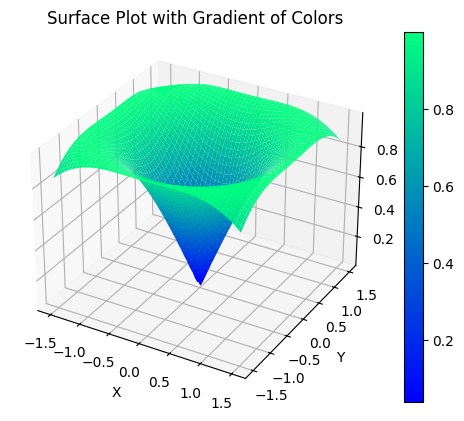

In [2]:
# function we are trying to fit with DNN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate data
x = np.linspace(-3/2, 3/2, 100)
y = np.linspace(-3/2, 3/2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a gradient of colors
surf = ax.plot_surface(X, Y, Z, cmap='winter')

# Add colorbar
fig.colorbar(surf)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot with Gradient of Colors')

# Show the plot
plt.show()

In [101]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [102]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

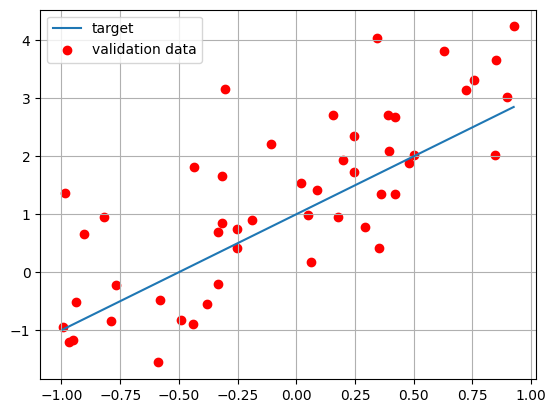

In [103]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [104]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [105]:
# get a summary of our composed model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [106]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 4ms/step - loss: 5.8425 - mse: 5.8425 - val_loss: 5.2127 - val_mse: 5.2127
Epoch 2/30
16/16 [==============================] - 0s 1ms/step - loss: 4.7358 - mse: 4.7358 - val_loss: 4.2656 - val_mse: 4.2656
Epoch 3/30
16/16 [==============================] - 0s 1ms/step - loss: 3.9166 - mse: 3.9166 - val_loss: 3.5535 - val_mse: 3.5535
Epoch 4/30
16/16 [==============================] - 0s 1ms/step - loss: 3.2986 - mse: 3.2986 - val_loss: 3.0136 - val_mse: 3.0136
Epoch 5/30
16/16 [==============================] - 0s 1ms/step - loss: 2.8199 - mse: 2.8199 - val_loss: 2.5954 - val_mse: 2.5954
Epoch 6/30
16/16 [==============================] - 0s 1ms/step - loss: 2.4457 - mse: 2.4457 - val_loss: 2.2773 - val_mse: 2.2773
Epoch 7/30
16/16 [==============================] - 0s 1ms/step - loss: 2.1558 - mse: 2.1558 - val_loss: 2.0253 - val_mse: 2.0253
Epoch 8/30
16/16 [==============================] - 0s 1ms/step - loss: 1.9207 - mse: 1.92

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [107]:
# return weights and biases
model.get_weights()

[array([[1.9642105]], dtype=float32), array([0.89068645], dtype=float32)]

In [108]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 1.1119 - mse: 1.1119

Test loss: 1.1119258403778076
Test accuracy: 1.1119258403778076


In [109]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119

Test loss: 0.011948440223932266
Test accuracy: 0.011948440223932266


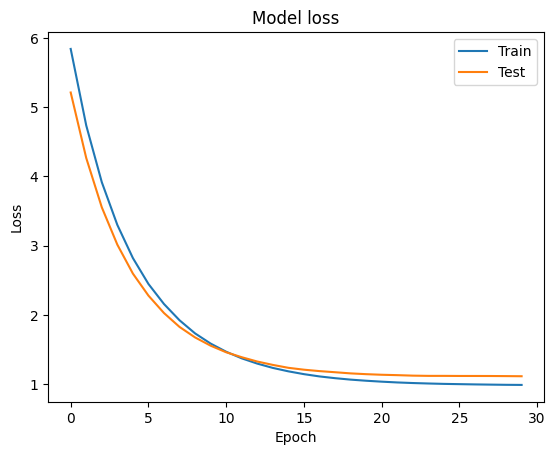

In [110]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 682us/step


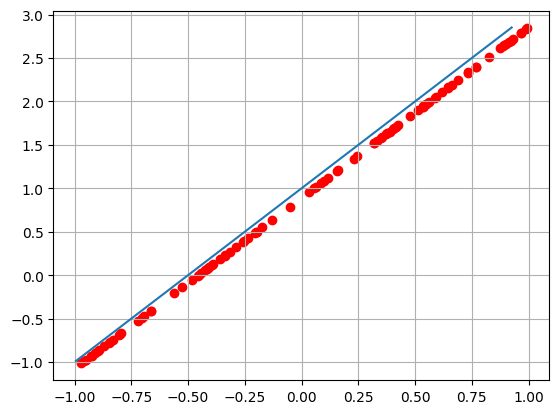

In [111]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()